# Линейная регрессия (рекап)

# $y = w_1x_1 + w_2x_2 +  ... + w_nx_n$

# $y = \sum_{i=1}^{n} w_ix_i$

<img src="https://i.stack.imgur.com/gzrsx.png" alt="Alternative text" width="800"/>

<img src="https://hackerwins.github.io/assets/img/2019-08-19-dls-c1-week3/neural-network-representation.png" alt="Alternative text"  width="800"/>

 $a_1^{[1]} = w_{11}x_1 + w_{21}x_2 + w_{31}x_3$

$a_2^{[1]} = w_{12}x_1 + w_{22}x_2 + w_{32}x_3$

$a_3^{[1]} = w_{13}x_1 + w_{23}x_2 + w_{33}x_3$

$a_4^{[1]} = w_{14}x_1 + w_{24}x_2 + w_{34}x_3$

$a^{[2]} = b_1 a_1^{[1]} + b_2 a_2^{[1]} + b_3 a_3^{[1]} + b_4 a_4^{[1]}$



$a^{[2]} = b_1 (w_{11}x_1 + w_{21}x_2 + w_{31}x_3) + b_2 (w_{12}x_1 + w_{22}x_2 + w_{32}x_3) + b_3 (w_{13}x_1 + w_{23}x_2 + w_{33}x_3) + b_4 (w_{14}x_1 + w_{24}x_2 + w_{34}x_3)$

### Почему не используют линейные глубокие сети?


$a^{[2]} = b_1w_{11}x_1 + b_1w_{21}x_2 + b_1w_{31}x_3 + b_2w_{12}x_1 + b_2w_{22}x_2 + b_2w_{32}x_3 + b_3w_{13}x_1 + b_3w_{23}x_2 + b_3w_{33}x_3 +  b_4w_{14}x_1 + b_4w_{24}x_2 + b_4w_{34}x_3$

$a^{[2]} = (b_1w_{11}x_1 + b_2w_{12}x_1 + b_3w_{13}x_1 + b_4w_{14}x_1) + (b_1w_{21}x_2 + b_2w_{22}x_2 + b_3w_{23}x_2 + b_4w_{24}x_2) + (b_1w_{31}x_3 + b_2w_{32}x_3 + b_3w_{33}x_3  + b_4w_{34}x_3)$

$a^{[2]} = x_1(b_1w_{11} + b_2w_{12} + b_3w_{13} + b_4w_{14}) + x_2(b_1w_{21} + b_2w_{22} + b_3w_{23} + b_4w_{24}) + x_3(b_1w_{31} + b_2w_{32} + b_3w_{33} + b_4w_{34})$

$a^{[2]} = C_1 x_1 + C_2 x_2 + C_3 x_3$


### Если взять нелинейность


$a_1^{[1]} = f_1(w_{11}x_1 + w_{21}x_2 + w_{31}x_3)$

$a_2^{[1]} = f_2(w_{12}x_1 + w_{22}x_2 + w_{32}x_3)$

$a_3^{[1]} = f_3(w_{13}x_1 + w_{23}x_2 + w_{33}x_3)$

$a_4^{[1]} = f_4(w_{14}x_1 + w_{24}x_2 + w_{34}x_3)$

$a^{[2]} = b_1 a_1^{[1]} + b_2 a_2^{[1]} + b_3 a_3^{[1]} + b_4 a_4^{[1]}$

$a^{[2]} = b_1 f_1 + b_2 f_2 + b_3 f_3 + b_4 f_4$

### Попробуйте привести $a^{[2]}$ к виду $C_1 x_1 + C_2 x_2 + C_3 x_3$, если считать, что $f_i(x) = x^2$ или $f_i(x) = \frac{1}{1+e^{-x}}$

# Логистическая регрессия или нейрон с нелинейной функцией активации?

<img src="https://carpentries-incubator.github.io/ml4bio-workshop/assets/logit_nodes.png" alt="Alternative text"  width="800"/>

# Алгоритм обратного распространения ошибки

$L = (y - \hat{y})^2$

$\hat{y} = w_1x_1 + w_2x_2$

$L = (y - \hat{y})^2 = L = (y - (w_1x_1 + w_2x_2))^2$

$\frac{dL}{dw_1} = 2(y - (w_1x_1 + w_2x_2)) (-x_1)$

$\frac{dL}{dw_2} = 2(y - (w_1x_1 + w_2x_2)) (-x_2)$

---
$L = (y - \hat{y})^2$

$f_1 = w_1x_1 + w_2x_2$

$f_2 = w_3x_1 + w_4x_2$

$\hat{y} = w_5f_1 + w_6f_2$

$L = (y - \hat{y})^2 = L = (y - (w_5f_1 + w_6f_2))^2$

$\frac{dL}{dw_5} = 2(y - (w_5f_1 + w_6f_2)) (-f_1)$

$\frac{dL}{dw_6} = 2(y - (w_5f_1 + w_6f_2)) (-f_2)$


$\frac{dL}{dw_1} = \frac{dL}{df_1}\frac{df_1}{dw_1} \rightarrow$

$\frac{dL}{df_1} = 2(y - (w_5f_1 + w_6f_2)) (-w_5)$

$\frac{df_1}{dw_1} = x_1 \rightarrow $

$\frac{dL}{dw_1} = \frac{dL}{df_1}\frac{df_1}{dw_1} = 2(y - (w_5f_1 + w_6f_2)) (-w_5) * x_1$

# Теперь покажем как это всё высчитывается через torch

In [1]:
import torch
import math
import matplotlib.pyplot as plt

1. $\bar{a}$ - vector

2. $\bar{b} = sin(\bar{a})$

3. $\bar{c} = 2 * \bar{b}$

4. $\bar{d} = \bar{c} + 1$

5. $out = \sum d_i$ - scalar

In [2]:
a = torch.linspace(0., 2.* math.pi, steps=25, requires_grad=True)
a

tensor([0.0000, 0.2618, 0.5236, 0.7854, 1.0472, 1.3090, 1.5708, 1.8326, 2.0944,
        2.3562, 2.6180, 2.8798, 3.1416, 3.4034, 3.6652, 3.9270, 4.1888, 4.4506,
        4.7124, 4.9742, 5.2360, 5.4978, 5.7596, 6.0214, 6.2832],
       requires_grad=True)

In [3]:
print(a.grad)

None


In [4]:
b = torch.sin(a)
b

tensor([ 0.0000e+00,  2.5882e-01,  5.0000e-01,  7.0711e-01,  8.6603e-01,
         9.6593e-01,  1.0000e+00,  9.6593e-01,  8.6603e-01,  7.0711e-01,
         5.0000e-01,  2.5882e-01, -8.7423e-08, -2.5882e-01, -5.0000e-01,
        -7.0711e-01, -8.6603e-01, -9.6593e-01, -1.0000e+00, -9.6593e-01,
        -8.6603e-01, -7.0711e-01, -5.0000e-01, -2.5882e-01,  1.7485e-07],
       grad_fn=<SinBackward0>)

In [5]:
# a.detach().numpy()

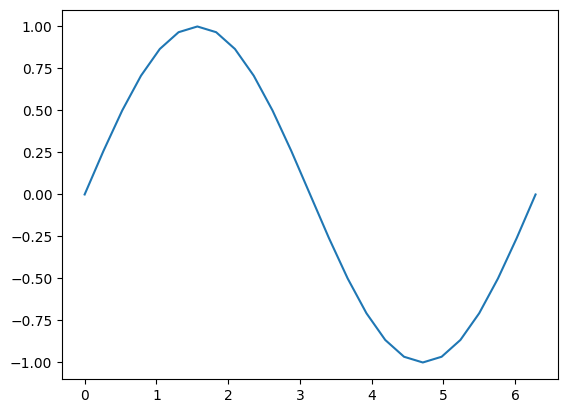

In [6]:
plt.plot(a.detach(), b.detach())

In [7]:
c = 2 * b
print(c)

d = c + 1
print(d)

tensor([ 0.0000e+00,  5.1764e-01,  1.0000e+00,  1.4142e+00,  1.7321e+00,
         1.9319e+00,  2.0000e+00,  1.9319e+00,  1.7321e+00,  1.4142e+00,
         1.0000e+00,  5.1764e-01, -1.7485e-07, -5.1764e-01, -1.0000e+00,
        -1.4142e+00, -1.7321e+00, -1.9319e+00, -2.0000e+00, -1.9319e+00,
        -1.7321e+00, -1.4142e+00, -1.0000e+00, -5.1764e-01,  3.4969e-07],
       grad_fn=<MulBackward0>)
tensor([ 1.0000e+00,  1.5176e+00,  2.0000e+00,  2.4142e+00,  2.7321e+00,
         2.9319e+00,  3.0000e+00,  2.9319e+00,  2.7321e+00,  2.4142e+00,
         2.0000e+00,  1.5176e+00,  1.0000e+00,  4.8236e-01, -3.5763e-07,
        -4.1421e-01, -7.3205e-01, -9.3185e-01, -1.0000e+00, -9.3185e-01,
        -7.3205e-01, -4.1421e-01,  4.7684e-07,  4.8236e-01,  1.0000e+00],
       grad_fn=<AddBackward0>)


In [8]:
out = d.sum()
out

tensor(25., grad_fn=<SumBackward0>)

In [9]:
d.grad_fn

In [10]:
d.grad_fn.next_functions

((<MulBackward0 at 0x2bda059d7b0>, 0), (None, 0))

In [11]:
out.backward()

In [12]:
a.grad

tensor([ 2.0000e+00,  1.9319e+00,  1.7321e+00,  1.4142e+00,  1.0000e+00,
         5.1764e-01, -8.7423e-08, -5.1764e-01, -1.0000e+00, -1.4142e+00,
        -1.7321e+00, -1.9319e+00, -2.0000e+00, -1.9319e+00, -1.7321e+00,
        -1.4142e+00, -1.0000e+00, -5.1764e-01,  2.3850e-08,  5.1764e-01,
         1.0000e+00,  1.4142e+00,  1.7321e+00,  1.9319e+00,  2.0000e+00])

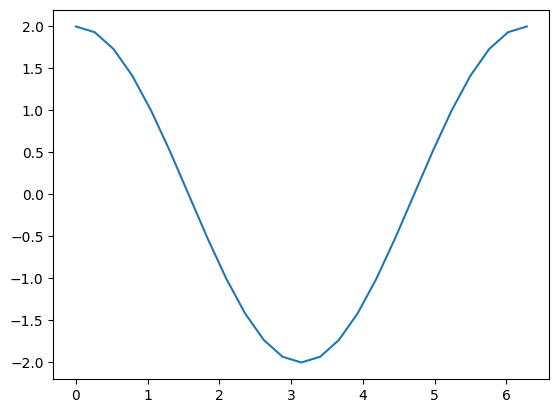

In [13]:
plt.plot(a.detach(), a.grad.detach())

$out = \sum sin(a_i) * 2 +1 $

$\frac{d out}{d a_i} = 2 * cos(a_i)$

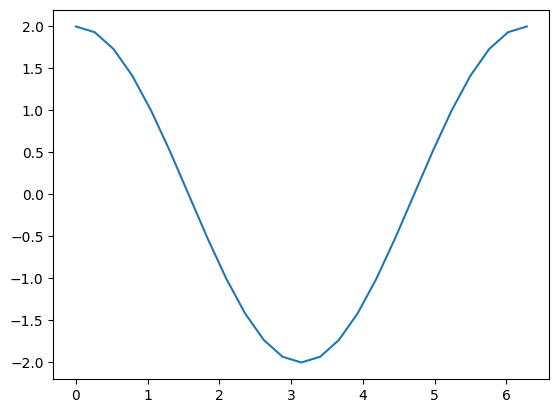

In [14]:
plt.plot(a.detach(), 2*torch.cos(a).detach())

In [15]:
#a = torch.linspace(0., 2.* math.pi, steps=25, requires_grad=True)
# Так делать нельзя, иначе будет ошибка
#a += 1 #RuntimeError: a leaf Variable that requires grad is being used in an in-place operation.

In [16]:
a = torch.linspace(0., 2.* math.pi, steps=25, requires_grad=True)
# Нужно делать так
a = a + 1

In [17]:
a

tensor([1.0000, 1.2618, 1.5236, 1.7854, 2.0472, 2.3090, 2.5708, 2.8326, 3.0944,
        3.3562, 3.6180, 3.8798, 4.1416, 4.4034, 4.6652, 4.9270, 5.1888, 5.4506,
        5.7124, 5.9742, 6.2360, 6.4978, 6.7596, 7.0214, 7.2832],
       grad_fn=<AddBackward0>)

In [18]:
torch.randn((3,4), requires_grad=True).requires_grad

True

# Напишем нейронную сеть с нуля, используя MNIST

In [19]:
import matplotlib.pyplot as plt
import numpy as np

import torch
import torchvision.datasets as datasets
from torch import nn
from torch import optim

In [20]:
# подгрузить данные в train датасет tuple(picture, target)
mnist_trainset = datasets.MNIST(root='./data', train=True, download=True, transform=None)
# подгрузить данные в test датасет tuple(picture, target)
mnist_testset = datasets.MNIST(root='./data', train=False, download=True, transform=None)

# выделить таргет для train в отдельную переменную
train_target = np.asarray([el[1] for el in mnist_trainset])
# выделить таргет для test в отдельную переменную
test_target = np.asarray([el[1] for el in mnist_testset])

# выделить картинку для train в отдельную переменную. Сделать шкалирование (пиксели от 0 до 255. Сделаем значения от 0 до 1)
raw_train_X = np.asarray([np.asarray(el[0])/255 for el in mnist_trainset])
# выделить картинку для test в отдельную переменную. Сделать шкалирование (пиксели от 0 до 255. Сделаем значения от 0 до 1)
raw_test_X = np.asarray([np.asarray(el[0])/255 for el in mnist_testset])

len(mnist_trainset), len(mnist_testset)

Processing
Done!
Files already downloaded


(60000, 10000)

In [21]:
raw_train_X.shape, train_target.shape

((60000, 28, 28), (60000,))

In [22]:
train_target[:5]

array([5, 0, 4, 1, 9], dtype=int64)

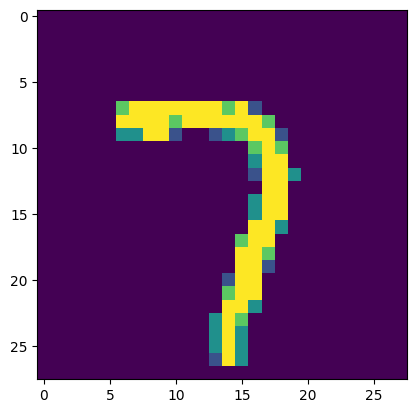

In [23]:
# отрисуем случайный элемент в датасете
rnd_ix = np.random.choice(range(raw_train_X.shape[0]), size=1)[0]
plt.imshow(raw_train_X[rnd_ix])

In [24]:
raw_train_X.shape

(60000, 28, 28)

In [25]:
28*28

784

In [26]:
# вытянем картинку в одномерный вектор
train_X = raw_train_X.reshape((raw_train_X.shape[0], raw_train_X.shape[1] * raw_train_X.shape[2])).astype(float)
test_X = raw_test_X.reshape((raw_test_X.shape[0], raw_test_X.shape[1] * raw_test_X.shape[2])).astype(float)

train_X.shape, test_X.shape

((60000, 784), (10000, 784))

In [27]:
# пример значений в одномерном векторе
train_X[0,345:350]

array([0.        , 0.        , 0.04313725, 0.74509804, 0.99215686])

# Вариант реализации #1

In [28]:
# количество нейронов в первом слое
neuron_n_layer1 = 256
# количество нейронов во втором (и последнем) слое. Их будет 10, так как таргет у нас от 0 до 9
neuron_n_layer2 = train_target.max() + 1
print(neuron_n_layer2)

# постепенное преобразование матрицы весов к нужному виду
#1. с помощью numpy получим матрицу, значения в которой распределены нормально
np_w1 = np.random.normal(size=(train_X.shape[1], neuron_n_layer1))
#2. преобразуем numpy матрицу в torch тензор. Необходимая обертка, чтобы torch завелся
w1 = torch.tensor(np_w1, requires_grad=True, dtype=torch.float32)

w2 = torch.tensor(
    np.random.normal(size=(neuron_n_layer1, neuron_n_layer2)), requires_grad=True, dtype=torch.float32)

10


In [29]:
w1.shape, type(w1), w2.shape

(torch.Size([784, 256]), torch.Tensor, torch.Size([256, 10]))

Формула softmax на выходе нейронки:
# $\frac{e^{-z_i}}{\sum e^{-z_j}}$

In [30]:
# Количество весов в нейронке:
784 * 256 + 256 * 10

203264

In [31]:
# количество эпох
epoches = 5000
# размер батча во время обучения
batch_size = 256
# learning rate
lr = 1e-2 # 0.01

# список, чтобы хранить качество на трейне
train_accs = []
# список, чтобы хранить качество на тесте
test_accs = []

# запускаем процесс по эпохам
for ix, epoch in enumerate(range(epoches)):
    # выбираем случайно batch_size индексов элементов датасета в трейне, которые будем подавать на вход нейронки для обучения
    batch_ixs = np.random.choice(range(train_target.shape[0]), size=batch_size, replace=True)
    # таргеты на них
    batch_target = train_target[batch_ixs]
    # картинки, вытянутые в один вектор.
    batch_X = train_X[batch_ixs]
    # преобразуем картинки и таргеты к нужному виду, чтобы торч работал
    batch_y_target = torch.tensor(batch_target, requires_grad=False)
    batch_train_X_tensor = torch.tensor(batch_X, dtype=torch.float32, requires_grad=False)
    # sigmoid(X_batch * w_1) * w_2 = logits
    logit_pred = torch.matmul(torch.matmul(batch_train_X_tensor, w1).sigmoid(), w2)
    # y_pred = sigmoid(logits)
    y_pred = logit_pred.exp()/(logit_pred.exp().sum(-1)).unsqueeze(-1)  #logit_pred - logit_pred.exp().sum(-1).log().unsqueeze(-1) #
    loss =  -y_pred[range(batch_y_target.shape[0]), batch_y_target].log().mean() #-y_pred[range(batch_y_target.shape[0]), batch_y_target].mean() #
    
    # расчет градиентов
    loss.backward()
    # обновление весов для первой и второгой матриц
    w1.data = w1.data - lr * w1.grad.data
    w2.data = w2.data - lr * w2.grad.data
    
    # обновляем градиенты, которые были посчитаны. Если этого не делать, то они будут накапливаться от итерации к итерации.
    w1.grad.data.zero_()
    w2.grad.data.zero_()
    
    # каждую сотую эпоху считаем качество на тесте. Просто 
    if ix % 100 == 0:
        test_y_target = torch.tensor(test_target, requires_grad=False)
        test_X_tensor = torch.tensor(test_X, dtype=torch.float32, requires_grad=False)
        logit_pred = torch.matmul(torch.matmul(test_X_tensor, w1).sigmoid(), w2)
        test_y_pred = logit_pred - logit_pred.exp().sum(-1).log().unsqueeze(-1)
        test_accuracy = (test_y_pred.argmax(dim=1) == test_y_target).type(torch.FloatTensor).mean()
        
        logit_pred = torch.matmul(torch.matmul(batch_train_X_tensor, w1).sigmoid(), w2)
        train_y_pred = logit_pred - logit_pred.exp().sum(-1).log().unsqueeze(-1)
        train_accuracy = (train_y_pred.argmax(dim=1) == batch_y_target).type(torch.FloatTensor).mean()
        print(f"train_accuracy: {train_accuracy}; test_accuracy: {test_accuracy}")
        
        test_accs.append(float(test_accuracy.data))
        train_accs.append(float(train_accuracy.data))
        # break

train_accuracy: 0.109375; test_accuracy: 0.11649999767541885
train_accuracy: 0.27734375; test_accuracy: 0.21150000393390656
train_accuracy: 0.234375; test_accuracy: 0.26260000467300415
train_accuracy: 0.30859375; test_accuracy: 0.31709998846054077
train_accuracy: 0.34765625; test_accuracy: 0.3675999939441681
train_accuracy: 0.359375; test_accuracy: 0.4050000011920929
train_accuracy: 0.40234375; test_accuracy: 0.4422000050544739
train_accuracy: 0.44921875; test_accuracy: 0.474700003862381
train_accuracy: 0.44921875; test_accuracy: 0.5023999810218811
train_accuracy: 0.50390625; test_accuracy: 0.5254999995231628
train_accuracy: 0.55078125; test_accuracy: 0.5444999933242798
train_accuracy: 0.5078125; test_accuracy: 0.5626999735832214
train_accuracy: 0.58984375; test_accuracy: 0.5778999924659729
train_accuracy: 0.53515625; test_accuracy: 0.5909000039100647
train_accuracy: 0.60546875; test_accuracy: 0.6032999753952026
train_accuracy: 0.62890625; test_accuracy: 0.6144999861717224
train_accura

In [32]:
test_y_target = torch.tensor(test_target, requires_grad=False)
test_X_tensor = torch.tensor(test_X, dtype=torch.float32, requires_grad=False)

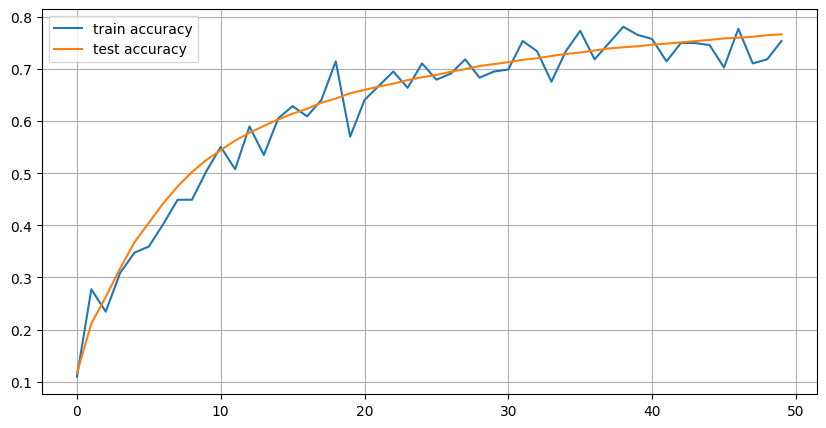

In [33]:
plt.figure(figsize=(10, 5))
plt.grid()
plt.plot(train_accs, label='train accuracy')
plt.plot(test_accs, label='test accuracy')
plt.legend()

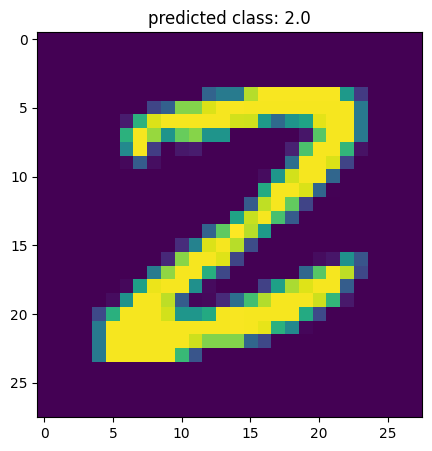

In [34]:
test_ix = np.random.choice(range(test_X_tensor.shape[0]), size=1)[0]
logit_pred = torch.matmul(torch.matmul(test_X_tensor[test_ix], w1).sigmoid(), w2)
test_y_pred = logit_pred - logit_pred.exp().sum(-1).log().unsqueeze(-1)
pred_class = float(test_y_pred.argmax().detach().numpy())

plt.figure(figsize=(10,5))
plt.title(f"predicted class: {pred_class}")
plt.imshow(raw_test_X[test_ix])

# Вариант реализации #2 (с модулями torch)

In [35]:
class MnistModel(nn.Module):
    
    def __init__(self, input_size, output_size):
        super().__init__()
        self.fc1 = nn.Linear(input_size, 30)
        self.fc2 = nn.Linear(30, output_size)
        
    def forward(self, x):
        x = self.fc1(x)
        x = nn.Sigmoid()(x)
        x = self.fc2(x)
        out = nn.LogSoftmax(dim=1)(x)
        return out

In [36]:
# model = MnistModel(train_X.shape[1], train_target.max()+1)
# for el in model.parameters():
#     print(el)

In [37]:
# количество эпох
epoches = 5000
# размер батча во время обучения
batch_size = 256
# learning rate
lr = 1e-2

# список, чтобы хранить качество на трейне
train_accs = []
# список, чтобы хранить качество на тесте
test_accs = []

# задаем loss
criterion = nn.NLLLoss()

# инициализируем модель
model = MnistModel(train_X.shape[1], train_target.max()+1)
# инициализируем оптимизатор
optimizer = optim.SGD(model.parameters(), lr=lr)

for ix, epoch in enumerate(range(epoches)):
    # выбираем случайно batch_size индексов элементов датасета в трейне, которые будем подавать на вход нейронки для обучения
    batch_ixs = np.random.choice(range(train_target.shape[0]), size=batch_size, replace=True)
    # таргеты на них
    batch_target = train_target[batch_ixs]
    # картинки, вытянутые в один вектор.
    batch_X = train_X[batch_ixs]
    # преобразуем картинки и таргеты к нужному виду, чтобы торч работал
    batch_y_target = torch.tensor(batch_target, requires_grad=False)
    batch_train_X_tensor = torch.tensor(batch_X, dtype=torch.float32, requires_grad=False)
    # обнуляем градиенты, чтобы накопление не шло
    optimizer.zero_grad()
    # получаем предсказания (умножение матриц и всякое такое)
    preds = model.forward(batch_train_X_tensor)
    # считаем лосс
    loss = criterion(preds, batch_y_target)
    # получаем градиенты на веса
    loss.backward()
    # обновляем веса, исходя из градиентов
    optimizer.step()
    # отрисовка качества
    if ix % 500 == 0:
        # torch.no_grad() нужна для того, чтобы модель понимала, что не надо считать градиенты и дополнительные параметры, а использовала то, что уже выучила.
        with torch.no_grad():
            test_y_pred = torch.exp(model.forward(test_X_tensor))
            test_accuracy = (test_y_pred.argmax(dim=1) == test_y_target).type(torch.FloatTensor).mean()

            train_y_pred = torch.exp(model.forward(batch_train_X_tensor))
            train_accuracy = (train_y_pred.argmax(dim=1) == batch_y_target).type(torch.FloatTensor).mean()
            
            print(f"train_accuracy: {train_accuracy}; test_accuracy: {test_accuracy}")

            test_accs.append(float(test_accuracy.data))
            train_accs.append(float(train_accuracy.data))
        # break

C:\python-3.12.0rc1-embed-amd64\python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


train_accuracy: 0.09375; test_accuracy: 0.08919999748468399
train_accuracy: 0.51171875; test_accuracy: 0.5
train_accuracy: 0.61328125; test_accuracy: 0.6241000294685364
train_accuracy: 0.61328125; test_accuracy: 0.6534000039100647
train_accuracy: 0.72265625; test_accuracy: 0.708299994468689
train_accuracy: 0.7578125; test_accuracy: 0.7524999976158142
train_accuracy: 0.77734375; test_accuracy: 0.7883999943733215
train_accuracy: 0.78125; test_accuracy: 0.8130000233650208
train_accuracy: 0.8359375; test_accuracy: 0.8270000219345093
train_accuracy: 0.80859375; test_accuracy: 0.8392000198364258


In [38]:
test_y_target = torch.tensor(test_target)
test_X_tensor = torch.tensor(test_X, dtype=torch.float32)

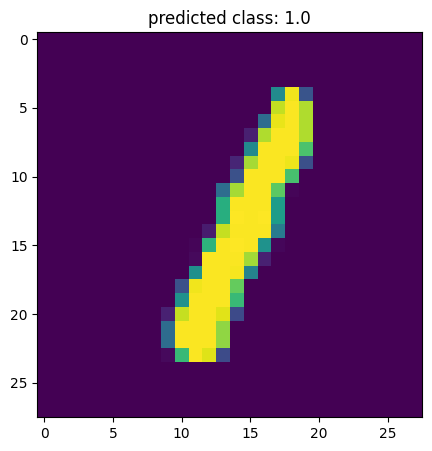

In [39]:
with torch.no_grad():
    test_ix = np.random.choice(range(test_X_tensor.shape[0]), size=1)[0]
    logit_pred = model.forward(test_X_tensor[test_ix][None,:])
    pred_class = float(logit_pred.argmax().detach().numpy())
    pred_class

    plt.figure(figsize=(10,5))
    plt.title(f"predicted class: {pred_class}")
    plt.imshow(raw_test_X[test_ix])